In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 30 20:25:42 2020
@author: fguan
"""
import matplotlib.pyplot as plt

class DiscretePID:
    """Discrete PID Controller that takes in the loss, dloss, accumulated loss
    and computes the output."""

    def __init__(self, P: float, I: float, D: float) -> None:
        """Initializes a discrete PID controller, given the P, I, D gains."""
        self.P = P
        self.I = I
        self.D = D
    
    def control(self, loss: float, dloss: float, aloss: float) -> float:
        """Given the loss, dloss and accumulated loss, computes the 
        compensation amount."""
        p_term = self.P * loss
        i_term = self.I * aloss
        d_term = self.D * dloss
        return p_term + i_term + d_term
            
            
def run(controller: DiscretePID, target: float = 1.0, current: float = 0.,
        iteration: int = 100) -> None:
    """Simulates the control with given iterations."""
    prev_loss = target - current
    aloss = 0.
    for i in range(iteration):
        loss = target - current
        aloss += loss
        dloss = loss - prev_loss
        u = controller.control(loss, dloss, aloss) # input to be applied.
        prev_loss = loss
        current += u
        plt.plot(i, target, 'ro')
        plt.plot(i, current, 'go')

In [136]:
c = DiscretePID(0.1, 0.1, 0.1) # P = I = D = 0.1

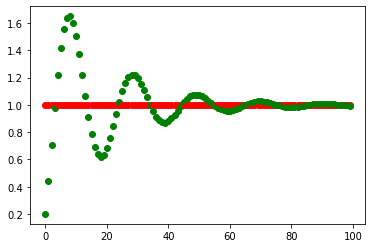

In [137]:
run(c, 1.0, 0.0, 100) # 100 iterations

In [133]:
c = DiscretePID(0.5, 0.05, 0.2) # P = 0.5, I = 0.05, D = 0.2

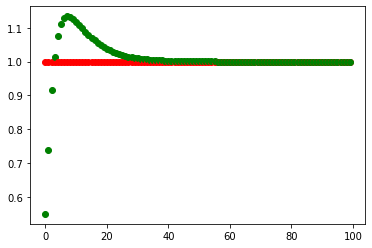

In [134]:
run(c, 1.0, 0.0, 100) # 100 Iterations.